# Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Import Dataset

In [2]:
path = '/content/KPMG_VI_New_raw_data_update_final (1).xlsx'

In [3]:
customer_address_df = pd.read_excel(path, sheet_name= 'CustomerAddress')
customer_address_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4


In [4]:
customer_demographic_df = pd.read_excel(path, sheet_name= 'CustomerDemographic')
customer_demographic_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [5]:
transaction_df = pd.read_excel(path, sheet_name= 'Transactions')
transaction_df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


# Data Cleaning

# customer_address_df

In [6]:
# rename columns

customer_address_df.columns = customer_address_df.iloc[0]
customer_address_df.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10


In [7]:
# drop row[0]

customer_address_df = customer_address_df.drop(index= 0, axis= 0)
customer_address_df.head(2)

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10


In [8]:
# reset index

customer_address_df = customer_address_df.reset_index().drop(columns= 'index', axis= 1)
customer_address_df.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10


In [9]:
# check data types

customer_address_df.dtypes

,0
0,
customer_id,object
address,object
postcode,object
state,object
country,object
property_valuation,object


In [10]:
# convert customer_id column to int

customer_address_df['customer_id'] = customer_address_df['customer_id'].astype(int)
print((customer_address_df['customer_id']).dtype)

int64


In [11]:
# convert 'postcode' column to int

customer_address_df['postcode'] = customer_address_df['postcode'].astype(int)
print((customer_address_df['postcode']).dtype)

int64


In [12]:
# convert 'property_valuation' column to int

customer_address_df['property_valuation'] = customer_address_df['property_valuation'].astype(int)
print((customer_address_df['property_valuation']).dtype)

int64


In [13]:
print(customer_address_df.dtypes)

0
customer_id            int64
address               object
postcode               int64
state                 object
country               object
property_valuation     int64
dtype: object


In [14]:
# check NULL values

print(customer_address_df.isnull().sum())

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64


In [15]:
# check of duplicated values

print(customer_address_df.duplicated().sum())

0


In [16]:
# check of data validity

print(customer_address_df['country'].unique())

['Australia']


In [17]:
print(customer_address_df['state'].unique())

['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']


In [18]:
# there are states have more than one formate
# Victoria like VIC & New South Wales like NSW & QLD for Queensland
# change it to one formate for each

for x in customer_address_df.index :
    if customer_address_df.loc[x, 'state'] == 'VIC' :
        customer_address_df.loc[x, 'state'] = 'Victoria'
    elif customer_address_df.loc[x, 'state'] == 'NSW' :
        customer_address_df.loc[x, 'state'] = 'New South Wales'
    elif customer_address_df.loc[x, 'state'] == 'QLD' :
        customer_address_df.loc[x, 'state'] = 'Queensland'

# check

customer_address_df['state'].unique()

array(['New South Wales', 'Queensland', 'Victoria'], dtype=object)

# customer_demographic_df

In [19]:
# rename column

customer_demographic_df.columns = customer_demographic_df.iloc[0]
customer_demographic_df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11


In [20]:
# drop row[0]

customer_demographic_df.drop(index= 0, axis= 0, inplace= True)
customer_demographic_df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16


In [21]:
# reset index

customer_demographic_df = customer_demographic_df.reset_index()
customer_demographic_df.head(2)

,index,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16


In [22]:
# drop column 'index'

customer_demographic_df.drop(columns= 'index', axis= 0, inplace= True)
customer_demographic_df.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16


In [23]:
# check data types

customer_demographic_df.dtypes

,0
0,
customer_id,object
first_name,object
last_name,object
gender,object
past_3_years_bike_related_purchases,object
DOB,object
job_title,object
job_industry_category,object
wealth_segment,object


In [24]:
# convert 'customer_id' to int

customer_demographic_df['customer_id'] = customer_demographic_df['customer_id'].astype(int)
customer_demographic_df['customer_id']

,customer_id
0,1
1,2
2,3
3,4
4,5
...,...
3995,3996
3996,3997
3997,3998
3998,3999


In [25]:
# convert 'past_3_years_bike_related_purchases' to int

customer_demographic_df['past_3_years_bike_related_purchases'] = customer_demographic_df['past_3_years_bike_related_purchases'].astype(int)
customer_demographic_df['past_3_years_bike_related_purchases']

,past_3_years_bike_related_purchases
0,93
1,81
2,61
3,33
4,56
...,...
3995,8
3996,87
3997,60
3998,11


In [26]:
# convert 'DOB' to datetime

customer_demographic_df['DOB'] = pd.to_datetime(customer_demographic_df['DOB'])
customer_demographic_df['DOB']

,DOB
0,1953-10-12
1,1980-12-16
2,1954-01-20
3,1961-10-03
4,1977-05-13
...,...
3995,1975-08-09
3996,2001-07-13
3997,NaT
3998,1973-10-24


In [27]:
# convert 'tenure' to float

customer_demographic_df['tenure'] = customer_demographic_df['tenure'].astype(float)
customer_demographic_df['tenure']

,tenure
0,11.0
1,16.0
2,15.0
3,7.0
4,8.0
...,...
3995,19.0
3996,1.0
3997,NaN
3998,10.0


In [28]:
# check NULL values

customer_demographic_df.isnull().any(), customer_demographic_df.isnull().sum()

(0
 customer_id                            False
 first_name                             False
 last_name                               True
 gender                                 False
 past_3_years_bike_related_purchases    False
 DOB                                     True
 job_title                               True
 job_industry_category                   True
 wealth_segment                         False
 deceased_indicator                     False
 default                                 True
 owns_car                               False
 tenure                                  True
 dtype: bool,
 0
 customer_id                              0
 first_name                               0
 last_name                              125
 gender                                   0
 past_3_years_bike_related_purchases      0
 DOB                                     87
 job_title                              506
 job_industry_category                  656
 wealth_segment               

In [29]:
# try to get missing data by 'customer_id' column

customer_demographic_df['customer_id'].duplicated().any(), customer_demographic_df['customer_id'].duplicated().sum()

(np.False_, np.int64(0))

In [30]:
# drop Null values.
customer_demographic_df.dropna(inplace= True, axis= 0)

In [31]:
# check of data validity of 'default' column

customer_demographic_df['default'].head()

,default
0,"""'"
1,<script>alert('hi')</script>
2,2018-02-01 00:00:00
8,0/0
9,ð©ð½


In [32]:
# drop 'dufault' column

customer_demographic_df.drop(columns= 'default', axis= 1, inplace= True)
customer_demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0


In [33]:
# check remaining Null values

customer_demographic_df.isnull().any(), customer_demographic_df.isnull().sum()

(0
 customer_id                            False
 first_name                             False
 last_name                              False
 gender                                 False
 past_3_years_bike_related_purchases    False
 DOB                                    False
 job_title                              False
 job_industry_category                  False
 wealth_segment                         False
 deceased_indicator                     False
 owns_car                               False
 tenure                                 False
 dtype: bool,
 0
 customer_id                            0
 first_name                             0
 last_name                              0
 gender                                 0
 past_3_years_bike_related_purchases    0
 DOB                                    0
 job_title                              0
 job_industry_category                  0
 wealth_segment                         0
 deceased_indicator                     0
 owns_ca

In [34]:
# check of data validity of 'gender' column

customer_demographic_df['gender'].unique()

array(['F', 'Male', 'Female', 'Femal'], dtype=object)

In [35]:
# there are more than one formate for some records..
# 'F' & 'Femal' like 'Female'..
# change it to one formate for each record.

for x in customer_demographic_df.index :
    if customer_demographic_df.loc[x, 'gender'] == 'F' :
        customer_demographic_df.loc[x, 'gender'] = 'Female'
    elif customer_demographic_df.loc[x, 'gender'] == 'Femal' :
        customer_demographic_df.loc[x, 'gender'] = 'Female'

# drop records = 'U'

customer_demographic_df = customer_demographic_df[customer_demographic_df['gender'] != 'U']

# check

customer_demographic_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [36]:
# check of data validity of 'customer_id' column..
# customers who are not in customer_address_df are not valid.

customer_address_df.shape

(3999, 6)

In [37]:
customer_demographic_df.shape

(2630, 12)

In [38]:
# merge 'customer_address_df' & 'customer_demographic_df' in one df and drop not valid.

df = pd.merge(customer_address_df, customer_demographic_df, on= 'customer_id')

# transaction_df

In [39]:
# rename columns

transaction_df.columns = transaction_df.iloc[0]

In [40]:
# drop row[0]

transaction_df.drop(index= 0, axis= 0, inplace= True)

In [41]:
# reset index

transaction_df.reset_index(inplace= True)

In [42]:
# drop 'index' column

transaction_df.drop(columns= 'index', axis= 1, inplace= True)

In [43]:
# check of data types

transaction_df.dtypes

,0
0,
transaction_id,object
product_id,object
customer_id,object
transaction_date,object
online_order,object
order_status,object
brand,object
product_line,object
product_class,object


In [44]:
# convert 'transaction_id' to int

transaction_df.transaction_id = transaction_df.transaction_id.astype(int)

In [45]:
# convert 'product_id' to int

transaction_df.product_id = transaction_df.product_id.astype(int)

In [46]:
# convert 'transaction_date' to datetime

transaction_df.transaction_date = pd.to_datetime(transaction_df.transaction_date)

In [47]:
# convert 'list_price' to float

transaction_df.list_price = transaction_df.list_price.astype(float)

In [48]:
# convert 'standard_cost' to float

transaction_df.standard_cost = transaction_df.standard_cost.astype(float)

In [49]:
# convert 'product_first_sold_date' to datetime

transaction_df.product_first_sold_date = pd.to_datetime\
(transaction_df.product_first_sold_date, format='%d%m%y', exact= False, errors='raise', utc= True)

In [50]:
# ignore records that year greater than 2023

transaction_df.product_first_sold_date = transaction_df.product_first_sold_date[transaction_df.product_first_sold_date.dt.year<2023]

In [51]:
# check Null values

transaction_df.isnull().any(), transaction_df.isnull().sum()

(0
 transaction_id             False
 product_id                 False
 customer_id                False
 transaction_date           False
 online_order                True
 order_status               False
 brand                       True
 product_line                True
 product_class               True
 product_size                True
 list_price                 False
 standard_cost               True
 product_first_sold_date     True
 dtype: bool,
 0
 transaction_id                0
 product_id                    0
 customer_id                   0
 transaction_date              0
 online_order                360
 order_status                  0
 brand                       197
 product_line                197
 product_class               197
 product_size                197
 list_price                    0
 standard_cost               197
 product_first_sold_date    9917
 dtype: int64)

In [52]:
# drop NaT records

transaction_df.dropna(inplace= True, axis= 0)

In [53]:
# check remaining Null values

transaction_df.isnull().any(), transaction_df.isnull().sum()

(0
 transaction_id             False
 product_id                 False
 customer_id                False
 transaction_date           False
 online_order               False
 order_status               False
 brand                      False
 product_line               False
 product_class              False
 product_size               False
 list_price                 False
 standard_cost              False
 product_first_sold_date    False
 dtype: bool,
 0
 transaction_id             0
 product_id                 0
 customer_id                0
 transaction_date           0
 online_order               0
 order_status               0
 brand                      0
 product_line               0
 product_class              0
 product_size               0
 list_price                 0
 standard_cost              0
 product_first_sold_date    0
 dtype: int64)

In [54]:
# try to find missing values by 'transaction_id' column

transaction_df.transaction_id.duplicated().any(), transaction_df.transaction_id.duplicated().sum()

(np.False_, np.int64(0))

In [55]:
# merge df & transaction_df in one df and drop invalid customer

df = pd.merge(df, transaction_df, on= 'customer_id')

df.head(2)

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,Female,93,...,2017-05-11,True,Approved,Trek Bicycles,Road,low,small,1720.7,1531.42,1982-07-03 00:00:00+00:00
1,1,060 Morning Avenue,2016,New South Wales,Australia,10,Laraine,Medendorp,Female,93,...,2017-01-05,False,Approved,Norco Bicycles,Standard,medium,medium,360.4,270.30,1987-07-03 00:00:00+00:00


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6592 entries, 0 to 6591
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype              
---  ------                               --------------  -----              
 0   customer_id                          6592 non-null   object             
 1   address                              6592 non-null   object             
 2   postcode                             6592 non-null   int64              
 3   state                                6592 non-null   object             
 4   country                              6592 non-null   object             
 5   property_valuation                   6592 non-null   int64              
 6   first_name                           6592 non-null   object             
 7   last_name                            6592 non-null   object             
 8   gender                               6592 non-null   object             
 9   past_3_years_bike_related_purc

# Data analysis

In [79]:
df.corr(numeric_only= True)

,postcode,property_valuation,past_3_years_bike_related_purchases,tenure,transaction_id,product_id,list_price,standard_cost,Year,Month
0,,,,,,,,,,
postcode,1.000000,-0.514442,-0.035946,0.002764,0.000980,0.014465,0.004602,-0.002083,NaN,0.012795
property_valuation,-0.514442,1.000000,0.017854,-0.020769,-0.011400,-0.000702,0.004228,0.011205,NaN,-0.020331
past_3_years_bike_related_purchases,-0.035946,0.017854,1.000000,-0.028888,-0.011339,0.001592,-0.005677,-0.002553,NaN,-0.012985
tenure,0.002764,-0.020769,-0.028888,1.000000,0.008609,-0.005928,0.001389,-0.003620,NaN,-0.001647
transaction_id,0.000980,-0.011400,-0.011339,0.008609,1.000000,0.010491,-0.002900,-0.026938,NaN,-0.016413
product_id,0.014465,-0.000702,0.001592,-0.005928,0.010491,1.000000,0.079980,0.017435,NaN,0.016279
list_price,0.004602,0.004228,-0.005677,0.001389,-0.002900,0.079980,1.000000,0.570402,NaN,-0.019706
standard_cost,-0.002083,0.011205,-0.002553,-0.003620,-0.026938,0.017435,0.570402,1.000000,NaN,-0.022797
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


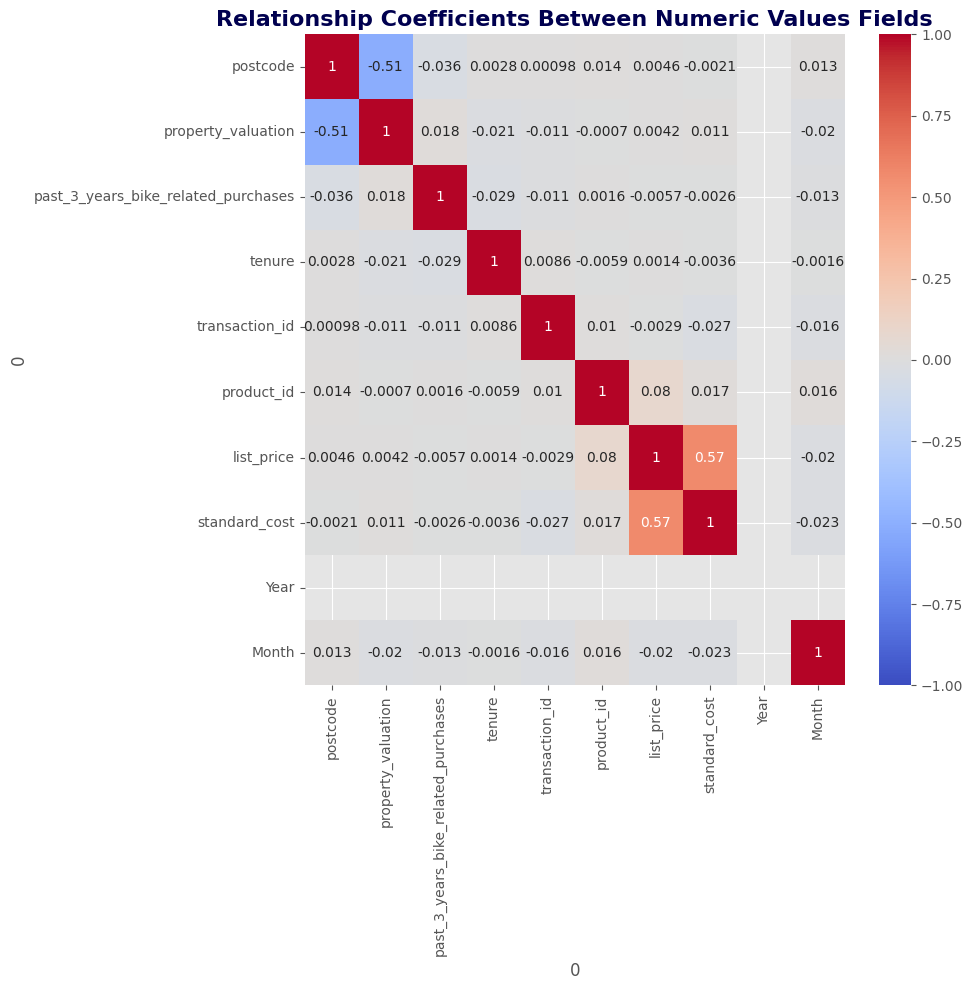

In [77]:
plt.figure(figsize= (10, 10))
sns.heatmap(data= df.corr(numeric_only=True), annot= True, vmax= 1, vmin= -1, cmap= 'coolwarm')
plt.title('Relationship Coefficients Between Numeric Values Fields', fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})
plt.tight_layout()
plt.show()

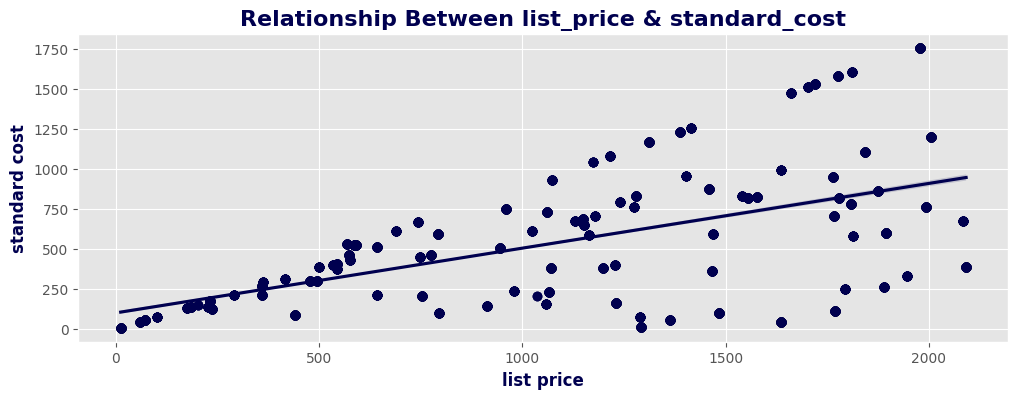

In [58]:
plt.figure(figsize= (12, 4))
sns.regplot(data= df, x= 'list_price', y= 'standard_cost', color= '#00004f')
plt.title('Relationship Between list_price & standard_cost', fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})
plt.xlabel('list price', fontdict= {'size': 12, 'weight': 'bold', 'color': '#00004f'})
plt.ylabel('standard cost', fontdict= {'size': 12, 'weight': 'bold', 'color': '#00004f'})
plt.show()

In [80]:
print(df.groupby('transaction_date').agg({'list_price': 'mean'}))

0                  list_price
transaction_date             
2017-01-01        1136.787778
2017-01-02        1221.927857
2017-01-03        1073.744400
2017-01-04        1122.520714
2017-01-05        1187.754000
...                       ...
2017-12-26        1101.060769
2017-12-27        1171.176875
2017-12-28        1226.223889
2017-12-29        1317.518889
2017-12-30        1258.735000

[364 rows x 1 columns]


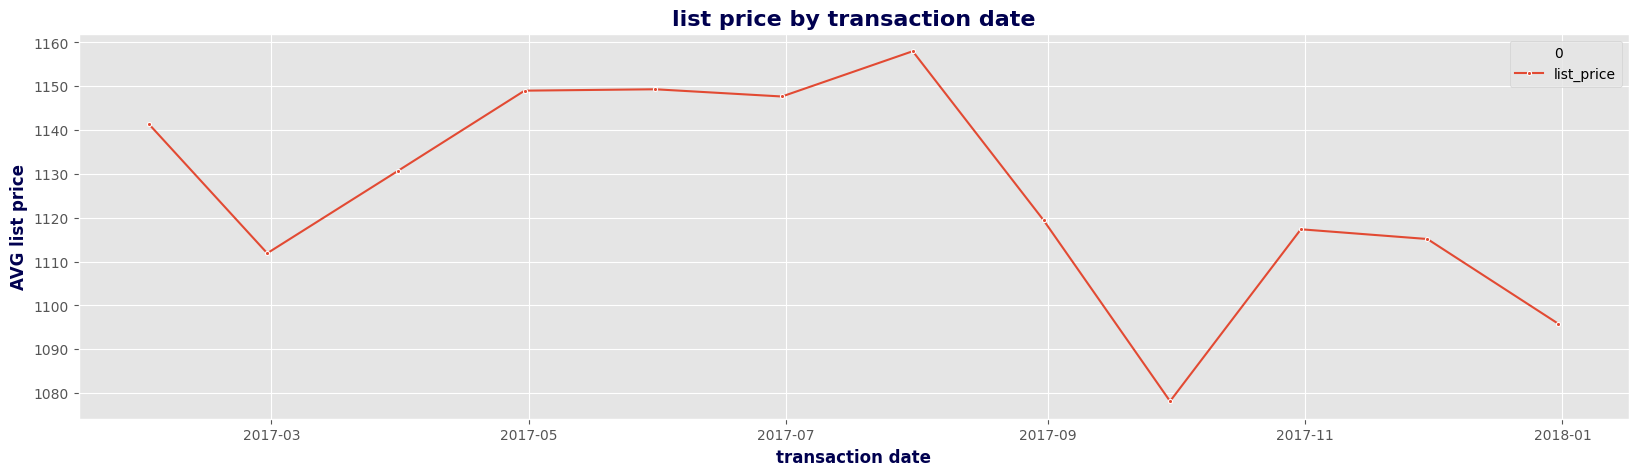

In [93]:
plt.figure(figsize= (20, 5))
sns.lineplot(data= df.set_index('transaction_date').resample('ME').agg({'list_price': 'mean'}), color= '#00004f', legend= 'auto', markers= '.')
plt.title('list price by transaction date', fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})
plt.xlabel('transaction date', fontdict= {'size': 12, 'weight': 'bold', 'color': '#00004f'})
plt.ylabel('AVG list price', fontdict= {'size': 12, 'weight': 'bold', 'color': '#00004f'})
plt.show()

In [61]:
df.groupby('transaction_date').agg({'standard_cost': 'mean'})

,standard_cost
transaction_date,
2017-01-01,482.076667
2017-01-02,370.255000
2017-01-03,666.893200
2017-01-04,469.005000
2017-01-05,506.804800
...,...
2017-12-26,520.994615
2017-12-27,655.098750
2017-12-28,519.151667


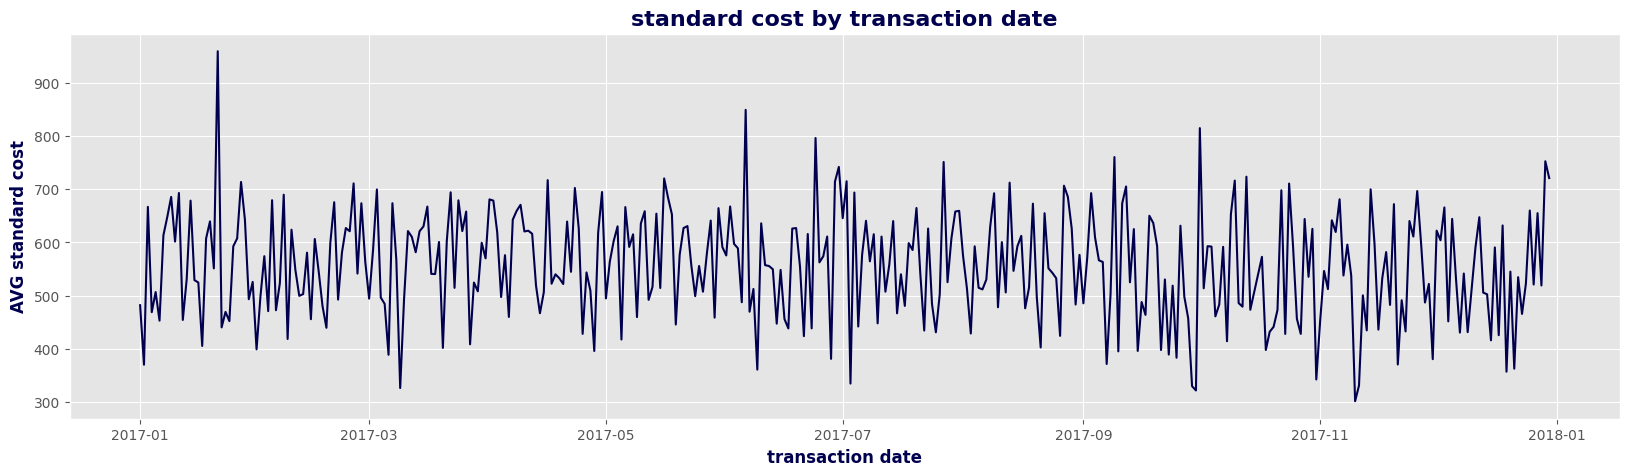

In [62]:
plt.figure(figsize= (20, 5))
plt.plot(df.groupby('transaction_date').agg({'standard_cost': 'mean'}), color= '#00004f')
plt.title('standard cost by transaction date', fontdict= {'size': 16, 'weight': 'bold', 'color': '#00004f'})
plt.xlabel('transaction date', fontdict= {'size': 12, 'weight': 'bold', 'color': '#00004f'})
plt.ylabel('AVG standard cost', fontdict= {'size': 12, 'weight': 'bold', 'color': '#00004f'})
plt.show()

In [63]:
df['Year'] = df['transaction_date'].dt.year

In [64]:
df['Month'] = df['transaction_date'].dt.month

In [65]:
df.groupby(['Year', 'Month']).agg({'list_price': 'mean'})

0            list_price
Year Month             
2017 1      1141.328569
     2      1111.906937
     3      1130.713646
     4      1149.003410
     5      1149.317785
     6      1147.671207
     7      1158.001313
     8      1119.467630
     9      1078.141345
     10     1117.373126
     11     1115.152018
     12     1095.834821

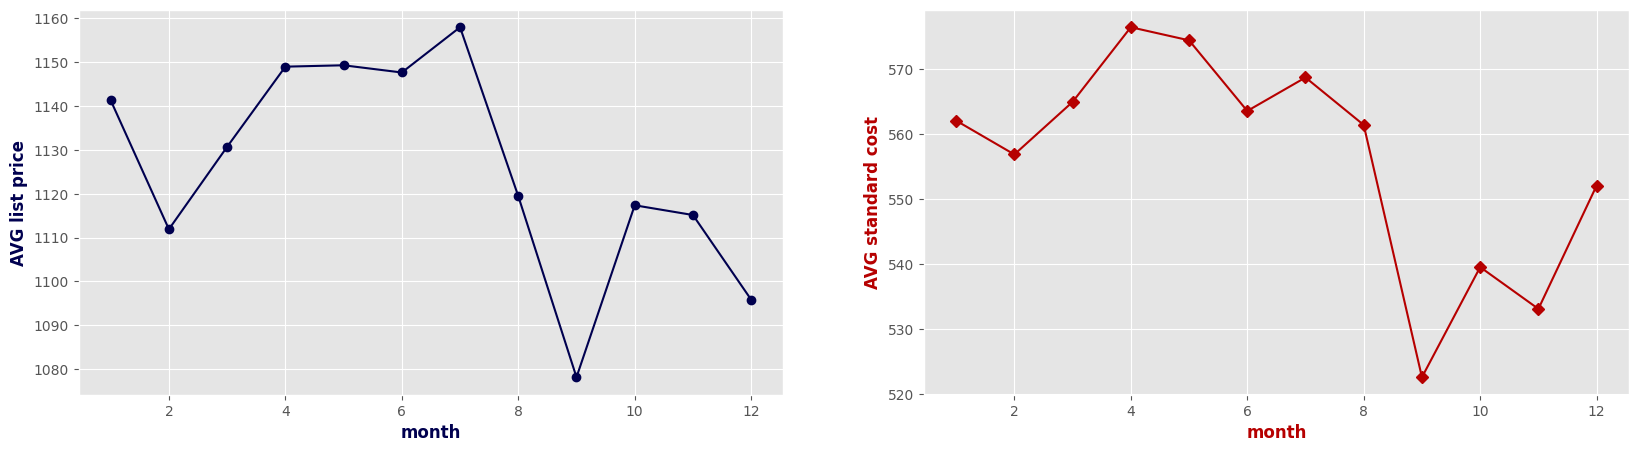

In [66]:
fig, ax = plt.subplots(figsize= (20, 5), nrows= 1, ncols= 2)

ax[0].plot(df.groupby('Month').agg({'list_price': 'mean'}), color= '#00004f', marker= 'o')
ax[0].set_xlabel('month', fontdict= {'size': 12, 'weight': 'bold', 'color': '#00004f'})
ax[0].set_ylabel('AVG list price', fontdict= {'size': 12, 'weight': 'bold', 'color': '#00004f'})

ax[1].plot(df.groupby('Month').agg({'standard_cost': 'mean'}), color= '#b60000', marker= 'D')
ax[1].set_xlabel('month', fontdict= {'size': 12, 'weight': 'bold', 'color': '#b60000'})
ax[1].set_ylabel('AVG standard cost', fontdict= {'size': 12, 'weight': 'bold', 'color': '#b60000'})

plt.show()